## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap

In [15]:
from numpy.random import default_rng
rng = default_rng()

# normal = rng.standard_normal((10,10))
# normal
random = rng.random((10,10))
random
# integers = rng.integers(0, 10, size=(10,10))
# integers

array([[0.11314407, 0.0082046 , 0.30950026, 0.4632632 , 0.60069951,
        0.18828849, 0.94602838, 0.30718682, 0.6889118 , 0.10612153],
       [0.24845104, 0.50150549, 0.84778846, 0.48242421, 0.55773626,
        0.40724807, 0.19715727, 0.56557004, 0.08091716, 0.13534642],
       [0.37763538, 0.41890193, 0.34956067, 0.31379875, 0.87101258,
        0.50793257, 0.41117938, 0.76409123, 0.54700097, 0.59413572],
       [0.24280609, 0.63686077, 0.1186807 , 0.56279797, 0.99143259,
        0.40708345, 0.12757332, 0.46960457, 0.53799304, 0.20046273],
       [0.87252135, 0.94751074, 0.25521146, 0.91689489, 0.94395985,
        0.07053559, 0.14770505, 0.30417491, 0.39483899, 0.8327256 ],
       [0.90278204, 0.76282097, 0.58322366, 0.68427526, 0.95154273,
        0.88887429, 0.36703165, 0.5795871 , 0.86897363, 0.51878502],
       [0.21839693, 0.36554159, 0.33779099, 0.41698788, 0.69258935,
        0.62413036, 0.33334322, 0.71452933, 0.07761843, 0.49825563],
       [0.86008693, 0.16880622, 0.4854165

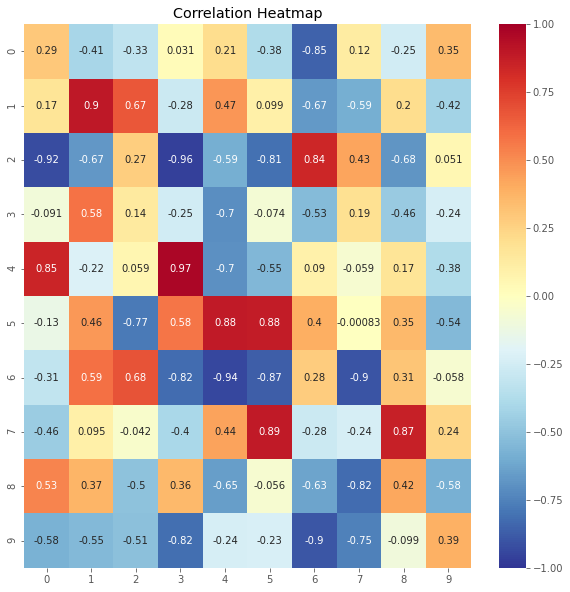

In [17]:
plt.figure(figsize=(10,10))

#數值分布自 -1.0 ~ 1.0 的矩陣
matrix = np.random.rand(10,10) * np.random.choice([-1,1], size=(10,10))
# 另一寫法: 原本隨機 0.0 ~ 1.0, 減 0.5 乘兩倍 -> -1.0 ~ 1.0 (轉為數值分布自 -1.0 ~ 1.0 的矩陣)
# matrix = (np.random.random((10,10)) - 0.5) * 2

sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)

plt.title('Correlation Heatmap');
plt.show()

### 2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

,index,0,1,2
0,0,0.463209,0.401490,-0.614210
1,1,0.498118,-0.161040,-0.981227
2,1,0.532645,-0.358224,-0.861132
3,1,0.554243,0.708975,-0.757695
4,1,-0.337309,-0.572780,-0.635991
...,...,...,...,...
995,2,0.598757,-0.271085,-0.876921
996,2,-0.736708,-0.515030,0.195404
997,0,-0.075998,0.713779,-0.993461
998,1,-0.125250,-0.434537,0.949289


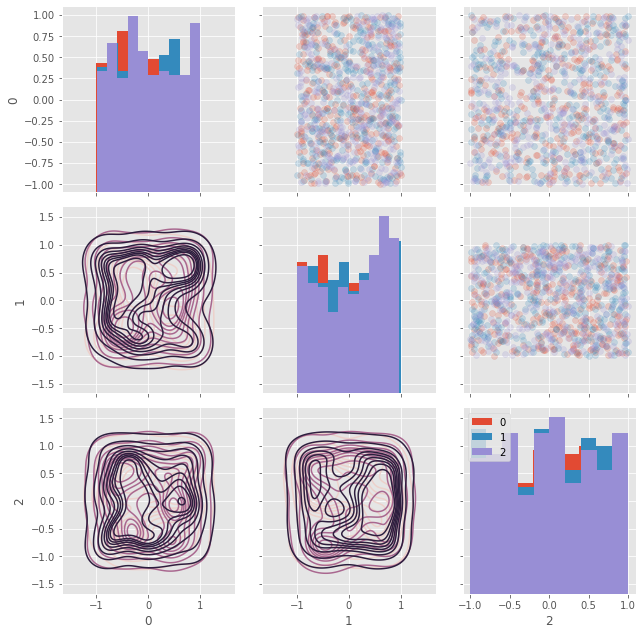

In [25]:
nrow = 1000
ncol = 3

matrix = np.random.rand(nrow,ncol) * np.random.choice([-1,1], size=(nrow,ncol))

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)

plot_data = pd.DataFrame(matrix, indice).reset_index()
display(plot_data)

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(plt.hist)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.legend()
plt.show()

### 3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

,index,0,1,2
0,2,0.515811,-1.084560,-0.273185
1,0,-0.442047,0.004433,0.622536
2,1,-1.311754,-0.753261,-0.770468
3,0,0.157672,1.732453,0.233474
4,2,-0.398855,0.963749,1.362800
...,...,...,...,...
995,0,-0.622045,0.066237,0.611801
996,1,-0.438591,1.157493,0.739904
997,2,0.041741,-0.689479,1.371196
998,2,0.858511,-0.008178,-0.133439


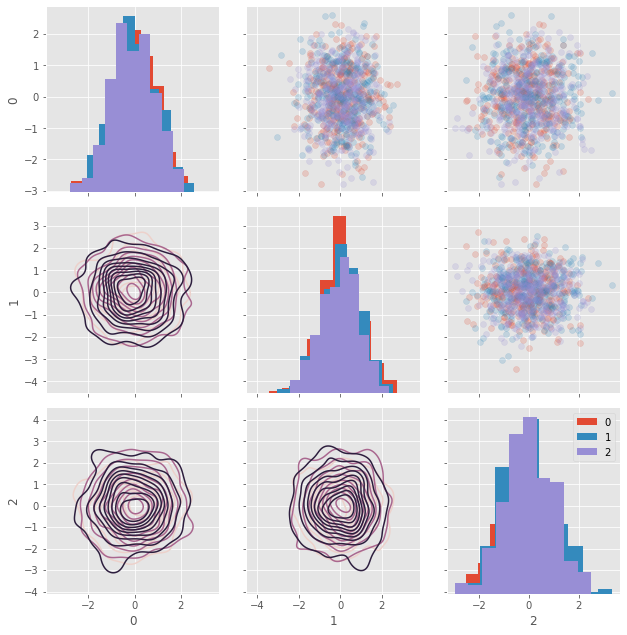

In [27]:
nrow = 1000
ncol = 3

matrix = np.random.randn(nrow,ncol) 

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()
display(plot_data)

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(plt.hist)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.legend()
plt.show()